# Importing Dependencies

In [58]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [59]:
# !pip install tensorflow

In [60]:
# !pip install matplotlib

# Checking versions

In [61]:
print(tf.__version__)
print(plt.matplotlib.__version__)

import matplotlib
print(matplotlib.__version__)

2.19.0
3.10.1
3.10.1


# Defining Constants

In [62]:
IMAGE_SIZE=128 #it is seen by choosing one image that can be any from the dataset then rightclick and see its properties > detail and we can see height and width or simply dimensions
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

# Load data into tf Dataset

In [63]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory="Dataset",
    seed=123,
    shuffle= True,
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 8982 files belonging to 3 classes.
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalAnd in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op SelectV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/dev

In [64]:
class_names=dataset.class_names
class_names

['mask_weared_incorrect', 'with_mask', 'without_mask']

In [65]:
len(dataset) #It is showing 281 cause every element in the dataset is actually the batch of 32 images 

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


281

In [66]:
281*32 # It shows the complete number of images in the dataset

8992

In [67]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(type(image_batch))
    print(label_batch.numpy())

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
(32, 128, 128, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
[0 0 2 2 2 2 2 2 1 2 0 0 0 1 1 0 1 2 0 1 0 1 1 1 1 1 2 2 2 2 1 0]
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


# Data Visualization

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetN

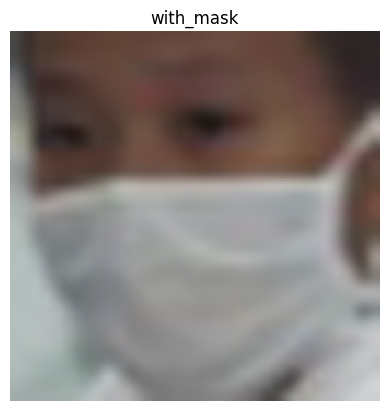

In [68]:
for image_batch, label_batch in dataset.take(1):  #everytime shows new image as it is shuffling
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst 

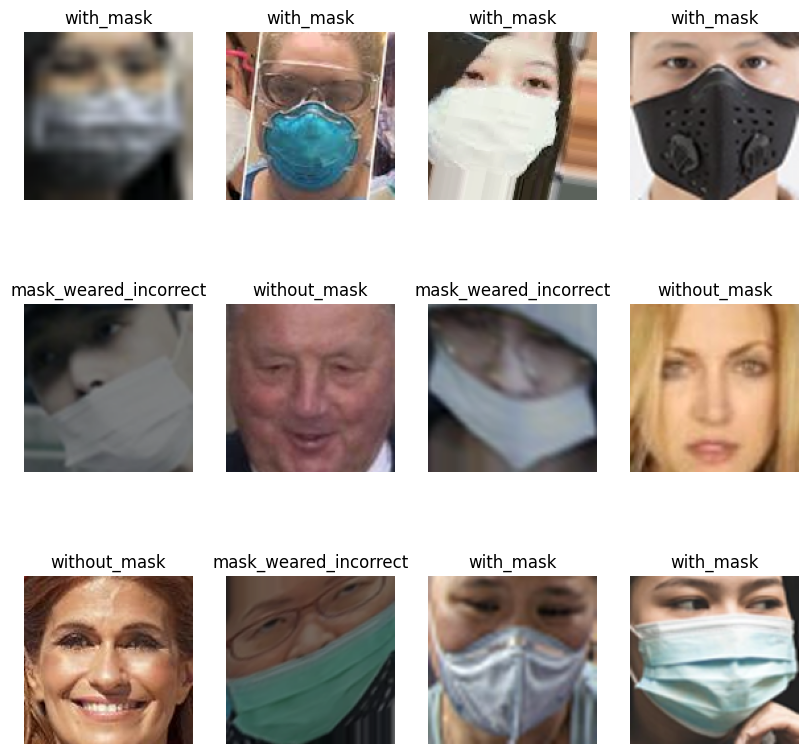

In [69]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1): 
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Train Test Split

## I have done
- 80% for training, 
- remaining 20% -> 10% for validation and 10% for test 

#### Training Dataset

In [73]:
train_size=0.8
len(dataset)*train_size

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


224.8

In [74]:
train_ds = dataset.take(224)
len(train_ds)

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


224

#### Testing and validation split from remaining 20%

In [76]:
test_ds = dataset.skip(224)
len(test_ds)

Executing op SkipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


57

In [78]:
len(dataset)

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


281

In [77]:
val_size=0.1
len(dataset)*val_size

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


28.1

#### Validation Dataset

In [84]:
val_ds=test_ds.take(28)
len(val_ds)

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


28

#### Testing Dataset

In [82]:
test_ds=test_ds.skip(28)
len(test_ds)

Executing op SkipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


29

### Wrapping everything what I have written so far in cells for train val and test split into a function 

In [87]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [88]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalAnd in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op SelectV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op SkipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op SkipDataset in device /j

In [89]:
len(train_ds)

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


224

In [90]:
len(val_ds)

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


28

In [91]:
len(test_ds)

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


29

### Cache, Shuffle, and Prefetch the Dataset

In [93]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #if gpu is busy training, then prefetch will load the next set of batch from the disk
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummyMemoryCache in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op CacheDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummyMemoryCache in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op CacheDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/device:CP